In [38]:
import pandas as pd
import ydata_profiling as yp
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("tested.csv")

In [6]:
data.shape

(418, 12)

In [8]:
data.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [14]:
report = yp.ProfileReport(data).get_description()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

<Axes: xlabel='Pclass', ylabel='Fare'>

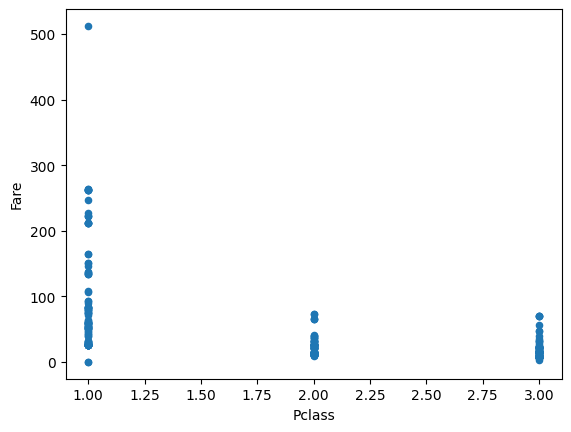

In [47]:
data.plot.scatter('Pclass','Fare')

In [48]:
report.correlations['auto']['Survived']

PassengerId    0.000000
Age            0.000000
SibSp          0.135817
Parch          0.213173
Fare           0.154378
Survived       1.000000
Pclass         0.106042
Sex            0.994818
Embarked       0.109303
Name: Survived, dtype: float64

In [50]:
numerical = list(filter(lambda variable:report.variables[variable]['type']=='Numeric',report.variables))

In [16]:
numerical

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

In [51]:
categorical = list(filter(lambda variable:report.variables[variable]['type']=='Categorical',report.variables))

In [52]:
categorical

['Survived', 'Pclass', 'Sex', 'Embarked']

In [17]:
label = 'Survived'

In [ ]:
#Correlation Score
## A Correlation Score of a variable(feature) with the label will tell u the impact of the same variable on making the function y more accurate.


In [54]:
columns = list(data.columns)

In [55]:
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [56]:
columns.remove('PassengerId')
columns.remove('Name')
columns.remove('Ticket')
columns.remove('Embarked')
columns.remove('Parch')
columns.remove('Cabin')
columns.remove('Pclass')

In [57]:
columns

['Survived', 'Sex', 'Age', 'SibSp', 'Fare']

In [58]:
data1 = data[columns]

In [65]:
data1

,Survived,Sex,Age,SibSp,Fare
0,0,0,34.50000,0,7.8292
1,1,1,47.00000,1,7.0000
2,0,0,62.00000,0,9.6875
3,0,0,27.00000,0,8.6625
4,1,1,22.00000,1,12.2875
...,...,...,...,...,...
413,0,0,30.27259,0,8.0500
414,1,1,39.00000,0,108.9000
415,0,0,38.50000,0,7.2500
416,0,0,30.27259,0,8.0500


In [64]:
data1['Age'].fillna(data1['Age'].mean(),inplace=True)

/var/folders/l4/hzr9pnz537ld_hkhgw859klm0000gn/T/ipykernel_1175/3404223605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age'].fillna(data1['Age'].mean(),inplace=True)


In [68]:
data1['Fare'].fillna(data1['Fare'].median(),inplace=True)

/var/folders/l4/hzr9pnz537ld_hkhgw859klm0000gn/T/ipykernel_1175/1998304269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Fare'].fillna(data1['Fare'].median(),inplace=True)


In [60]:
def mapper(x):
    if x == "male":
        return 0
    else:
        return 1

In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Fare      418 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [70]:
x_features = data1.columns.to_list()
x_features.remove('Survived')

In [71]:
label = 'Survived'

In [72]:
X_data = data1[x_features]

In [73]:
X_data

,Sex,Age,SibSp,Fare
0,0,34.50000,0,7.8292
1,1,47.00000,1,7.0000
2,0,62.00000,0,9.6875
3,0,27.00000,0,8.6625
4,1,22.00000,1,12.2875
...,...,...,...,...
413,0,30.27259,0,8.0500
414,1,39.00000,0,108.9000
415,0,38.50000,0,7.2500
416,0,30.27259,0,8.0500


In [74]:
Y_data = data1[label]

In [75]:
Y_data

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [77]:
## Algorithm
## 1. number of features (n) = 4
## 2. number of examples (m) = 418
## 3. Lets take random m1,m2,m3,m4,c
## 4. Calculate y_pred of all examples
## NUMPY VECTORIZATION
## Y_pred(418,1) = (418,4) dot (4,1) + c ## Numpy Vectorized Product
## Y_pred(418,1)
## X--Feature Vector ==> (418,1) + number ## Numpy Broad Casting
## Number of parameters ==> 4 + 1 = 5
## NUmber of weights -- Coefficients ==> 4
## number of bias or intercept ==> 1

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(X_data,Y_data)

LinearRegression()

In [1]:
import numpy as np

In [83]:
lr.coef_

array([ 1.00000000e+00,  1.56462548e-18, -5.07133421e-17, -3.57057894e-19])

In [84]:
lr.intercept_

1.5543122344752192e-15